# Importing Libraries

In [289]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

mpl.rcParams['figure.figsize'] = [16,9]
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle

# Basic CSV Loading

In [405]:
weather=pd.read_csv("Austin 2019-01-01 to 2023-07-22.csv")
weather.head(10)

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Austin,1/1/19,45.1,39.4,42.6,43.6,34.8,38.2,36.6,79.6,...,4.0,2,NaN,2019-01-01T07:27:35,2019-01-01T17:41:36,0.85,"Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,rain,"KATT,KAUS,72064800230,E4737,KEDC,72254013904,7..."
1,Austin,1/2/19,40.3,36.2,37.7,34.4,29.1,31.9,35.1,90.2,...,0.7,0,NaN,2019-01-02T07:27:48,2019-01-02T17:42:19,0.88,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,"KATT,KAUS,72064800230,E4737,KEDC,72254013904,7..."
2,Austin,1/3/19,51.8,34.7,40.9,51.8,31.0,37.6,35.6,82.6,...,7.6,5,NaN,2019-01-03T07:28:00,2019-01-03T17:43:03,0.92,"Rain, Partially cloudy",Partly cloudy throughout the day with rain cle...,rain,"KATT,KAUS,72064800230,E4737,KEDC,72254013904,7..."
3,Austin,1/4/19,65.9,32.5,46.2,65.9,29.1,45.1,32.9,64.8,...,12.4,6,NaN,2019-01-04T07:28:10,2019-01-04T17:43:48,0.95,Clear,Clear conditions throughout the day.,clear-day,"KATT,KAUS,72064800230,E4737,KEDC,72254013904,7..."
4,Austin,1/5/19,73.7,37.5,52.3,73.7,36.2,52.2,35.5,58.6,...,12.7,6,NaN,2019-01-05T07:28:19,2019-01-05T17:44:34,0.00,Clear,Clear conditions throughout the day.,clear-day,"KATT,KAUS,72064800230,E4737,KEDC,72254013904,7..."
5,Austin,1/6/19,71.8,40.8,55.5,71.8,40.8,55.5,47.8,76.1,...,7.8,4,NaN,2019-01-06T07:28:26,2019-01-06T17:45:20,0.02,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KATT,KAUS,72064800230,E4737,KEDC,72254013904,7..."
6,Austin,1/7/19,75.8,59.9,66.9,75.8,59.9,66.9,60.3,80.3,...,7.6,4,NaN,2019-01-07T07:28:31,2019-01-07T17:46:07,0.06,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KATT,KAUS,72064800230,E4737,KEDC,72254013904,7..."
7,Austin,1/8/19,76.1,55.1,63.4,76.1,55.1,63.4,51.4,69.1,...,9.9,5,NaN,2019-01-08T07:28:35,2019-01-08T17:46:55,0.09,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"KATT,KAUS,72064800230,E4737,KEDC,72254013904,7..."
8,Austin,1/9/19,61.8,47.2,54.3,61.8,47.2,54.3,29.7,39.5,...,11.2,5,NaN,2019-01-09T07:28:37,2019-01-09T17:47:44,0.12,Clear,Clear conditions throughout the day.,clear-day,"KATT,KAUS,72064800230,E4737,KEDC,72254013904,7..."
9,Austin,1/10/19,59.3,42.4,51.6,59.3,42.4,51.5,32.4,50.1,...,6.8,4,NaN,2019-01-10T07:28:37,2019-01-10T17:48:33,0.15,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KATT,KAUS,72064800230,E4737,KEDC,72254013904,7..."


# data preprocessing

In [406]:
weather.shape

(1664, 33)

In [407]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1664 entries, 0 to 1663
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1664 non-null   object 
 1   datetime          1664 non-null   object 
 2   tempmax           1664 non-null   float64
 3   tempmin           1664 non-null   float64
 4   temp              1664 non-null   float64
 5   feelslikemax      1664 non-null   float64
 6   feelslikemin      1664 non-null   float64
 7   feelslike         1664 non-null   float64
 8   dew               1664 non-null   float64
 9   humidity          1664 non-null   float64
 10  precip            1664 non-null   float64
 11  precipprob        1664 non-null   int64  
 12  precipcover       1664 non-null   float64
 13  preciptype        641 non-null    object 
 14  snow              1664 non-null   float64
 15  snowdepth         1664 non-null   float64
 16  windgust          1453 non-null   float64


In [408]:
weather.isnull().sum()

name                   0
datetime               0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1023
snow                   0
snowdepth              0
windgust             211
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility             0
solarradiation         0
solarenergy            0
uvindex                0
severerisk          1105
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               0
dtype: int64

In [409]:
# Percentage of missing values per row
row_missing_ratio = weather.isna().mean(axis=1)

In [410]:
row_missing_ratio

0       0.030303
1       0.030303
2       0.030303
3       0.090909
4       0.090909
          ...   
1659    0.030303
1660    0.030303
1661    0.000000
1662    0.030303
1663    0.000000
Length: 1664, dtype: float64

In [411]:
#Remove columns with ≥ 30% missing values
threshold = 0.30
weather = weather.loc[:, weather.isnull().mean() < threshold]

In [412]:
weather.isnull().sum()

name                  0
datetime              0
tempmax               0
tempmin               0
temp                  0
feelslikemax          0
feelslikemin          0
feelslike             0
dew                   0
humidity              0
precip                0
precipprob            0
precipcover           0
snow                  0
snowdepth             0
windgust            211
windspeed             0
winddir               0
sealevelpressure      0
cloudcover            0
visibility            0
solarradiation        0
solarenergy           0
uvindex               0
sunrise               0
sunset                0
moonphase             0
conditions            0
description           0
icon                  0
stations              0
dtype: int64

In [413]:
weather['windgust'].fillna(weather['windgust'].median(), inplace=True)

In [414]:
weather.shape

(1664, 31)

In [415]:
columns_to_remove = ['description', 'stations', 'sunrise','sunset','moonphase','name']
weather_new = weather.drop(columns=columns_to_remove)
weather_new

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,icon
0,1/1/19,45.1,39.4,42.6,43.6,34.8,38.2,36.6,79.6,0.001,...,13.9,359.6,1022.5,65.1,8.5,46.5,4.0,2,"Rain, Partially cloudy",rain
1,1/2/19,40.3,36.2,37.7,34.4,29.1,31.9,35.1,90.2,2.275,...,10.8,349.0,1021.5,90.7,4.5,8.5,0.7,0,"Rain, Overcast",rain
2,1/3/19,51.8,34.7,40.9,51.8,31.0,37.6,35.6,82.6,0.242,...,9.9,313.3,1017.8,53.2,7.4,88.9,7.6,5,"Rain, Partially cloudy",rain
3,1/4/19,65.9,32.5,46.2,65.9,29.1,45.1,32.9,64.8,0.000,...,7.8,312.5,1018.3,2.2,8.9,142.8,12.4,6,Clear,clear-day
4,1/5/19,73.7,37.5,52.3,73.7,36.2,52.2,35.5,58.6,0.000,...,8.9,217.8,1020.5,0.5,9.9,144.9,12.7,6,Clear,clear-day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1659,7/18/23,105.1,77.6,91.4,107.2,77.6,94.3,67.6,51.5,0.000,...,11.3,186.7,1014.7,3.9,9.9,277.9,24.1,9,Clear,clear-day
1660,7/19/23,103.8,77.6,90.7,107.6,77.6,94.6,69.3,54.3,0.000,...,15.5,174.9,1015.6,10.9,9.8,276.2,23.9,9,Clear,clear-day
1661,7/20/23,103.2,79.6,90.4,104.8,79.6,93.7,68.3,53.3,0.000,...,11.1,174.3,1015.8,24.0,9.8,277.7,23.9,9,Partially cloudy,partly-cloudy-day
1662,7/21/23,101.6,76.4,89.0,101.5,76.4,90.4,66.0,52.9,0.000,...,10.2,181.4,1013.7,9.3,9.8,273.5,23.6,8,Clear,clear-day


In [416]:
weather_new['datetime'] = pd.to_datetime(weather_new['datetime'])
weather_new.set_index('datetime', inplace=True)


In [417]:
weather_new['conditions'] = weather_new['conditions'].str.lower().str.strip()


In [418]:
def classify_cloudy(condition):
    condition = condition.lower().strip()
    
    if 'overcast' in condition:
        return 'Overcast'
    elif 'partially cloudy' in condition or 'partly cloudy' in condition:
        return 'Partially Cloudy'
    elif 'cloudy' in condition:
        return 'Overcast'
    else:
        return 'Clear'
weather_new['cloudy_class'] = weather_new['conditions'].apply(classify_cloudy)
weather_new

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,icon,cloudy_class
datetime,,,,,,,,,,,,,,,,,,,,,
2019-01-01,45.1,39.4,42.6,43.6,34.8,38.2,36.6,79.6,0.001,100,...,359.6,1022.5,65.1,8.5,46.5,4.0,2,"rain, partially cloudy",rain,Partially Cloudy
2019-01-02,40.3,36.2,37.7,34.4,29.1,31.9,35.1,90.2,2.275,100,...,349.0,1021.5,90.7,4.5,8.5,0.7,0,"rain, overcast",rain,Overcast
2019-01-03,51.8,34.7,40.9,51.8,31.0,37.6,35.6,82.6,0.242,100,...,313.3,1017.8,53.2,7.4,88.9,7.6,5,"rain, partially cloudy",rain,Partially Cloudy
2019-01-04,65.9,32.5,46.2,65.9,29.1,45.1,32.9,64.8,0.000,0,...,312.5,1018.3,2.2,8.9,142.8,12.4,6,clear,clear-day,Clear
2019-01-05,73.7,37.5,52.3,73.7,36.2,52.2,35.5,58.6,0.000,0,...,217.8,1020.5,0.5,9.9,144.9,12.7,6,clear,clear-day,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-18,105.1,77.6,91.4,107.2,77.6,94.3,67.6,51.5,0.000,0,...,186.7,1014.7,3.9,9.9,277.9,24.1,9,clear,clear-day,Clear
2023-07-19,103.8,77.6,90.7,107.6,77.6,94.6,69.3,54.3,0.000,0,...,174.9,1015.6,10.9,9.8,276.2,23.9,9,clear,clear-day,Clear
2023-07-20,103.2,79.6,90.4,104.8,79.6,93.7,68.3,53.3,0.000,0,...,174.3,1015.8,24.0,9.8,277.7,23.9,9,partially cloudy,partly-cloudy-day,Partially Cloudy


In [419]:
weather_new = weather_new.drop(columns=['conditions','icon'])
weather_new

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,cloudy_class
datetime,,,,,,,,,,,,,,,,,,,,,
2019-01-01,45.1,39.4,42.6,43.6,34.8,38.2,36.6,79.6,0.001,100,...,25.3,13.9,359.6,1022.5,65.1,8.5,46.5,4.0,2,Partially Cloudy
2019-01-02,40.3,36.2,37.7,34.4,29.1,31.9,35.1,90.2,2.275,100,...,20.8,10.8,349.0,1021.5,90.7,4.5,8.5,0.7,0,Overcast
2019-01-03,51.8,34.7,40.9,51.8,31.0,37.6,35.6,82.6,0.242,100,...,18.1,9.9,313.3,1017.8,53.2,7.4,88.9,7.6,5,Partially Cloudy
2019-01-04,65.9,32.5,46.2,65.9,29.1,45.1,32.9,64.8,0.000,0,...,24.7,7.8,312.5,1018.3,2.2,8.9,142.8,12.4,6,Clear
2019-01-05,73.7,37.5,52.3,73.7,36.2,52.2,35.5,58.6,0.000,0,...,24.7,8.9,217.8,1020.5,0.5,9.9,144.9,12.7,6,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-18,105.1,77.6,91.4,107.2,77.6,94.3,67.6,51.5,0.000,0,...,23.0,11.3,186.7,1014.7,3.9,9.9,277.9,24.1,9,Clear
2023-07-19,103.8,77.6,90.7,107.6,77.6,94.6,69.3,54.3,0.000,0,...,30.8,15.5,174.9,1015.6,10.9,9.8,276.2,23.9,9,Clear
2023-07-20,103.2,79.6,90.4,104.8,79.6,93.7,68.3,53.3,0.000,0,...,24.2,11.1,174.3,1015.8,24.0,9.8,277.7,23.9,9,Partially Cloudy


In [420]:
weather_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1664 entries, 2019-01-01 to 2023-07-22
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tempmax           1664 non-null   float64
 1   tempmin           1664 non-null   float64
 2   temp              1664 non-null   float64
 3   feelslikemax      1664 non-null   float64
 4   feelslikemin      1664 non-null   float64
 5   feelslike         1664 non-null   float64
 6   dew               1664 non-null   float64
 7   humidity          1664 non-null   float64
 8   precip            1664 non-null   float64
 9   precipprob        1664 non-null   int64  
 10  precipcover       1664 non-null   float64
 11  snow              1664 non-null   float64
 12  snowdepth         1664 non-null   float64
 13  windgust          1664 non-null   float64
 14  windspeed         1664 non-null   float64
 15  winddir           1664 non-null   float64
 16  sealevelpressure  1664 n

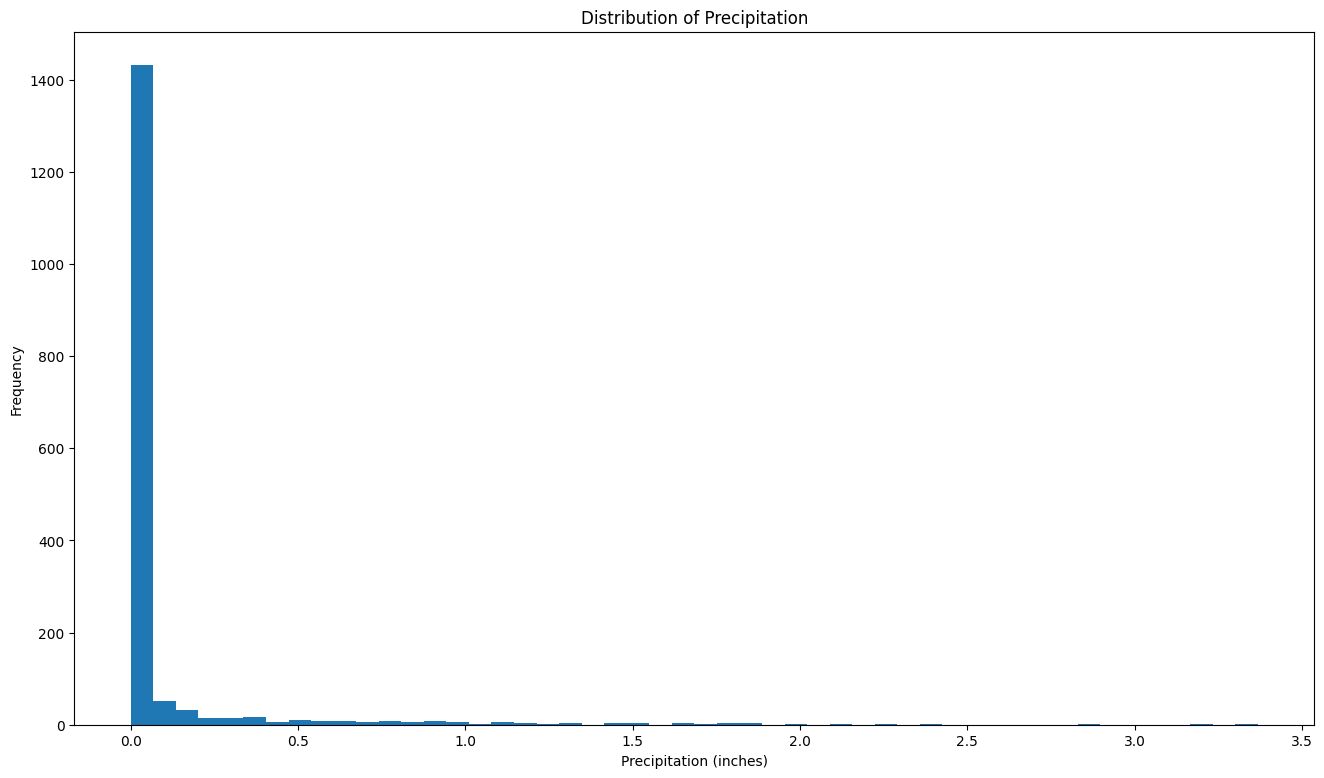

In [421]:
plt.figure()
plt.hist(weather_new['precip'], bins=50)
plt.xlabel('Precipitation (inches)')
plt.ylabel('Frequency')
plt.title('Distribution of Precipitation')
plt.show()

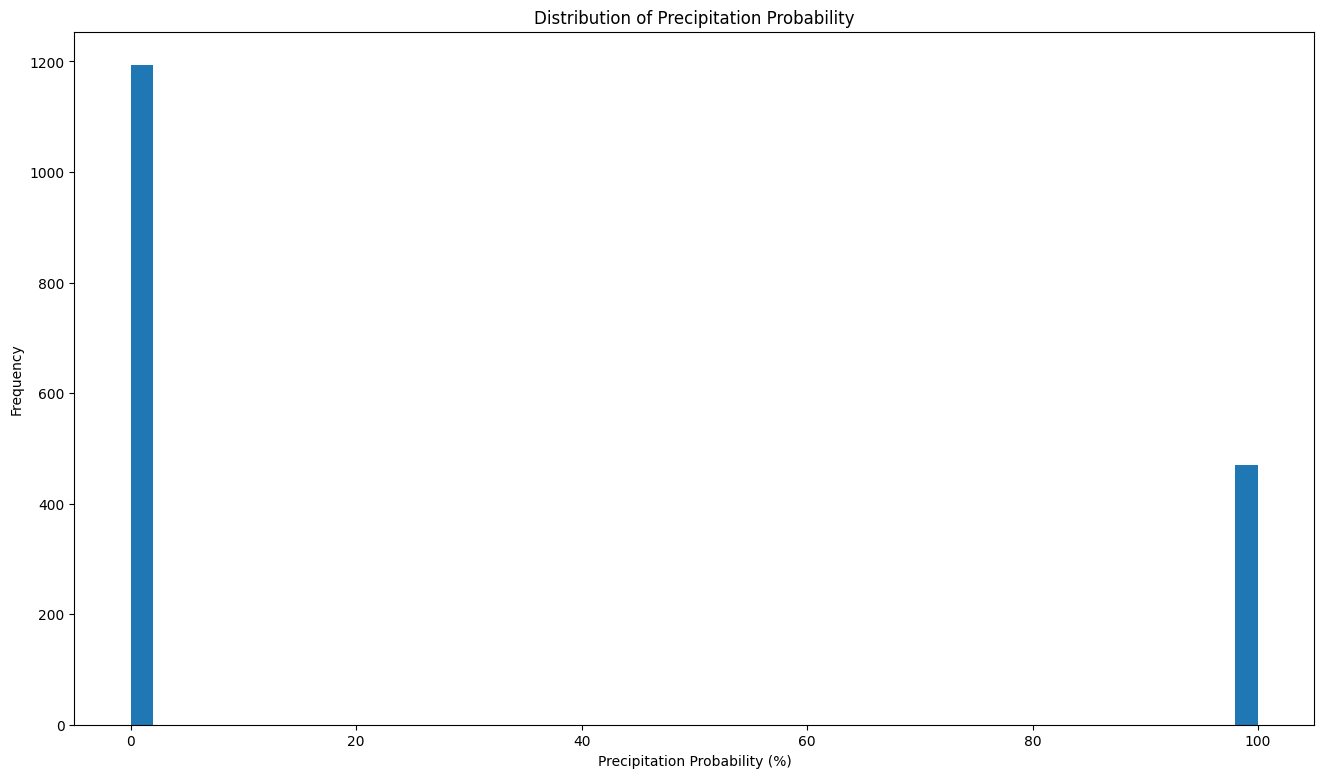

In [422]:
plt.figure()
plt.hist(weather_new['precipprob'], bins=50)
plt.xlabel('Precipitation Probability (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Precipitation Probability')
plt.show()

In [423]:
def rain_class(row):
    p = row['precip']
    prob = row['precipprob']

    if p == 0 and prob == 0:
        return 'no'
    elif p > 0.29:
        return 'heavy'
    elif p > 0:
        return 'mid'
    else:
        # p == 0 but prob == 100
        return 'mid'
weather_new['rain_class'] = weather_new.apply(rain_class, axis=1)
percentage = (weather_new['precip'] > 3).mean() * 100
print(f"Percentage of precip > 3: {percentage:.2f}%")
weather_new.drop(columns=['precip','precipprob','precipcover','solarenergy','solarradiation','uvindex','dew'], inplace=True)

Percentage of precip > 3: 0.12%


In [424]:
weather_new

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,humidity,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,cloudy_class,rain_class
datetime,,,,,,,,,,,,,,,,,
2019-01-01,45.1,39.4,42.6,43.6,34.8,38.2,79.6,0.0,0.0,25.3,13.9,359.6,1022.5,65.1,8.5,Partially Cloudy,mid
2019-01-02,40.3,36.2,37.7,34.4,29.1,31.9,90.2,0.0,0.0,20.8,10.8,349.0,1021.5,90.7,4.5,Overcast,heavy
2019-01-03,51.8,34.7,40.9,51.8,31.0,37.6,82.6,0.0,0.0,18.1,9.9,313.3,1017.8,53.2,7.4,Partially Cloudy,mid
2019-01-04,65.9,32.5,46.2,65.9,29.1,45.1,64.8,0.0,0.0,24.7,7.8,312.5,1018.3,2.2,8.9,Clear,no
2019-01-05,73.7,37.5,52.3,73.7,36.2,52.2,58.6,0.0,0.0,24.7,8.9,217.8,1020.5,0.5,9.9,Clear,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-18,105.1,77.6,91.4,107.2,77.6,94.3,51.5,0.0,0.0,23.0,11.3,186.7,1014.7,3.9,9.9,Clear,no
2023-07-19,103.8,77.6,90.7,107.6,77.6,94.6,54.3,0.0,0.0,30.8,15.5,174.9,1015.6,10.9,9.8,Clear,no
2023-07-20,103.2,79.6,90.4,104.8,79.6,93.7,53.3,0.0,0.0,24.2,11.1,174.3,1015.8,24.0,9.8,Partially Cloudy,no


In [425]:
print(weather_new['rain_class'].value_counts())

rain_class
no       1194
mid       342
heavy     128
Name: count, dtype: int64


# Feature Selection

In [427]:
from sklearn.preprocessing import LabelEncoder
le_cloudy = LabelEncoder()
le_rain = LabelEncoder()

weather_new['cloudy_class_num'] = le_cloudy.fit_transform(weather_new['cloudy_class'])
weather_new['rain_class_num'] = le_rain.fit_transform(weather_new['rain_class'])

print("Cloudy class mapping:")
print(dict(zip(le_cloudy.classes_, le_cloudy.transform(le_cloudy.classes_))))

print("\nRain class mapping:")
print(dict(zip(le_rain.classes_, le_rain.transform(le_rain.classes_))))

Cloudy class mapping:
{'Clear': np.int64(0), 'Overcast': np.int64(1), 'Partially Cloudy': np.int64(2)}

Rain class mapping:
{'heavy': np.int64(0), 'mid': np.int64(1), 'no': np.int64(2)}


In [428]:
weather_new.drop(columns=['cloudy_class', 'rain_class'], inplace=True)

weather_new

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,humidity,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,cloudy_class_num,rain_class_num
datetime,,,,,,,,,,,,,,,,,
2019-01-01,45.1,39.4,42.6,43.6,34.8,38.2,79.6,0.0,0.0,25.3,13.9,359.6,1022.5,65.1,8.5,2,1
2019-01-02,40.3,36.2,37.7,34.4,29.1,31.9,90.2,0.0,0.0,20.8,10.8,349.0,1021.5,90.7,4.5,1,0
2019-01-03,51.8,34.7,40.9,51.8,31.0,37.6,82.6,0.0,0.0,18.1,9.9,313.3,1017.8,53.2,7.4,2,1
2019-01-04,65.9,32.5,46.2,65.9,29.1,45.1,64.8,0.0,0.0,24.7,7.8,312.5,1018.3,2.2,8.9,0,2
2019-01-05,73.7,37.5,52.3,73.7,36.2,52.2,58.6,0.0,0.0,24.7,8.9,217.8,1020.5,0.5,9.9,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-18,105.1,77.6,91.4,107.2,77.6,94.3,51.5,0.0,0.0,23.0,11.3,186.7,1014.7,3.9,9.9,0,2
2023-07-19,103.8,77.6,90.7,107.6,77.6,94.6,54.3,0.0,0.0,30.8,15.5,174.9,1015.6,10.9,9.8,0,2
2023-07-20,103.2,79.6,90.4,104.8,79.6,93.7,53.3,0.0,0.0,24.2,11.1,174.3,1015.8,24.0,9.8,2,2


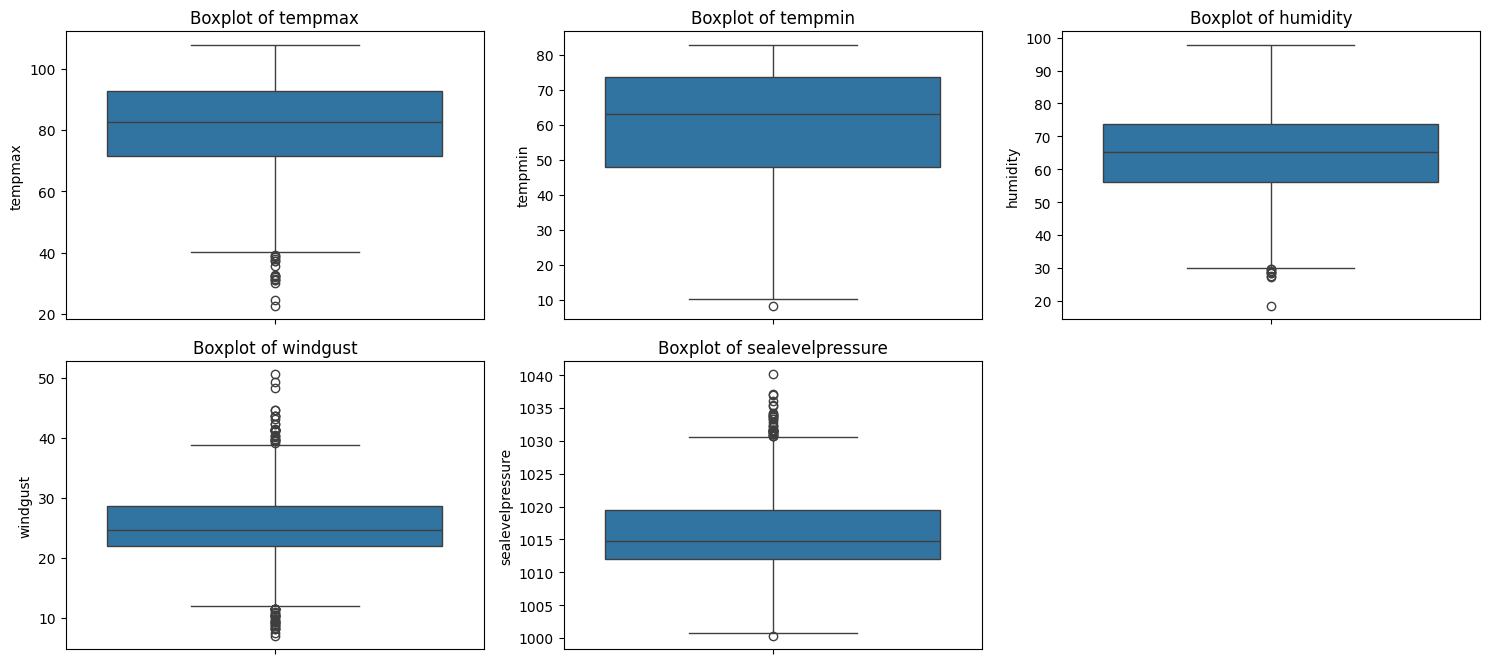

In [429]:
#Outlier detection
numeric_cols = ['tempmax','tempmin','humidity','windgust','sealevelpressure']  # Add other numeric features
plt.figure(figsize=(15,10))
for i,col in enumerate(numeric_cols,1):
    plt.subplot(3,3,i)
    sns.boxplot(weather_new[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

In [430]:
outlier_counts = {}

for col in numeric_cols:
    Q1 = weather_new[col].quantile(0.25)
    Q3 = weather_new[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = weather_new[(weather_new[col] < (Q1 - 1.5 * IQR)) | (weather_new[col] > (Q3 + 1.5 * IQR))]
    outlier_counts[col] = len(outliers)

print("Number of outliers in each column (IQR method):")
print(outlier_counts)

Number of outliers in each column (IQR method):
{'tempmax': 17, 'tempmin': 1, 'humidity': 9, 'windgust': 62, 'sealevelpressure': 33}


In [431]:
#Replace outliers with upper/lower limits
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = np.where(
        df[column] > upper_bound, upper_bound,
        np.where(df[column] < lower_bound, lower_bound, df[column])
    )

    return df

In [432]:
numeric_cols_a=['humidity','windgust']
for col in numeric_cols_a:
    weather_new = cap_outliers_iqr(weather_new, col)

In [433]:
def qq_plot(feature, name):
    plt.figure()
    stats.probplot(feature, dist="norm", plot=plt)
    plt.title(f"QQ Plot - {name}")
    plt.show()

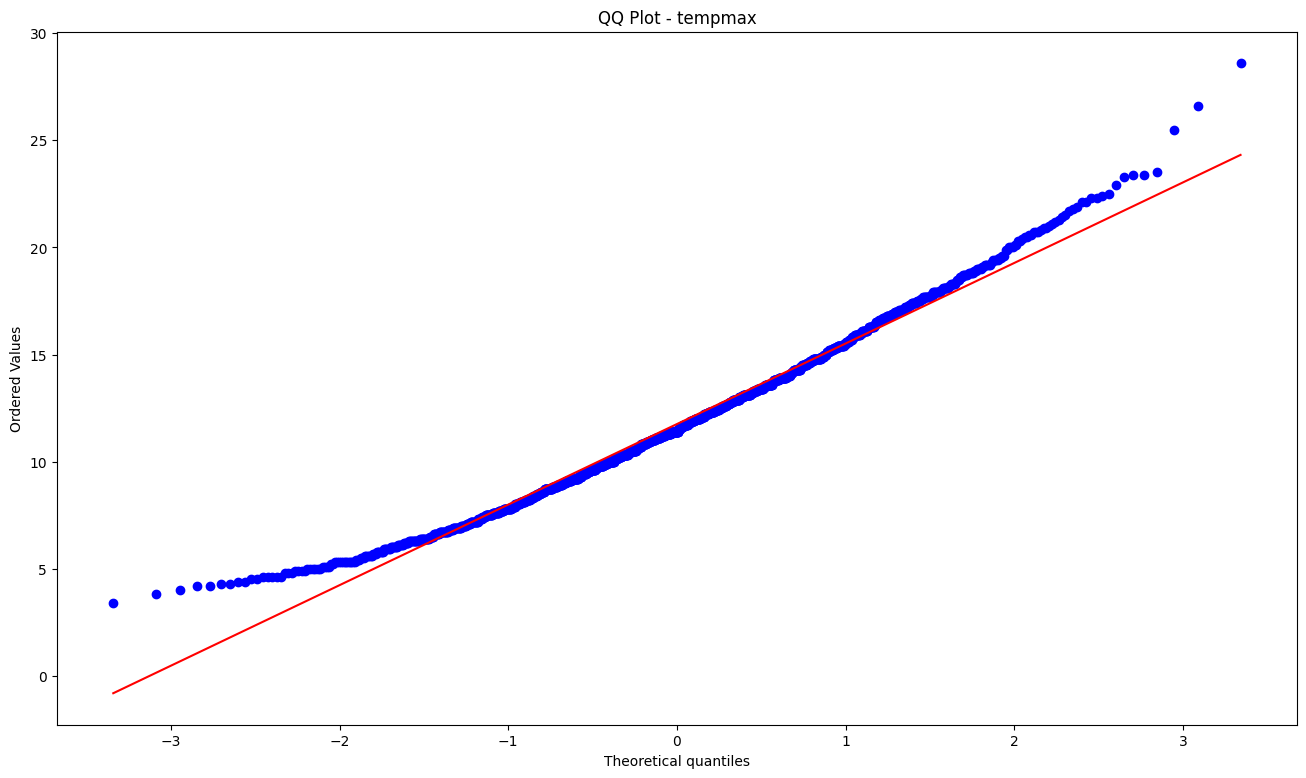

In [434]:
import scipy.stats as stats
qq_plot(weather_new['windspeed'], 'windspeed')

In [435]:
#shepartate data 
X=weather_new.drop(columns=[ 'cloudy_class_num','rain_class_num'])
Y=weather_new[['cloudy_class_num','rain_class_num']]
Y

,cloudy_class_num,rain_class_num
datetime,,
2019-01-01,2,1
2019-01-02,1,0
2019-01-03,2,1
2019-01-04,0,2
2019-01-05,0,2
...,...,...
2023-07-18,0,2
2023-07-19,0,2
2023-07-20,2,2


In [436]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y,
    test_size=0.2,      # 20% test data
    random_state=42,    # reproducibility
    stratify=Y          # keeps class balance (important)
)

In [437]:
//feature selection
corr_matrix = X_train.corr()

In [438]:
# Get the column names of the DataFrame
columns = corr_matrix.columns

# Create an empty list to keep track of columns to drop
columns_to_drop = []

# Loop over the columns
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        # Access the cell of the DataFrame
        if corr_matrix.loc[columns[i], columns[j]] > 0.95:
            columns_to_drop.append(columns[j])

print(len(columns_to_drop))

11


In [439]:
columns_to_drop = set(columns_to_drop)

In [440]:
columns_to_drop

{'feelslike', 'feelslikemax', 'feelslikemin', 'temp'}

In [441]:
X_train.drop(columns = columns_to_drop, axis = 1, inplace=True)
X_test.drop(columns = columns_to_drop, axis = 1, inplace=True)

In [442]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1331 entries, 2020-12-20 to 2021-01-12
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tempmax           1331 non-null   float64
 1   tempmin           1331 non-null   float64
 2   humidity          1331 non-null   float64
 3   snow              1331 non-null   float64
 4   snowdepth         1331 non-null   float64
 5   windgust          1331 non-null   float64
 6   windspeed         1331 non-null   float64
 7   winddir           1331 non-null   float64
 8   sealevelpressure  1331 non-null   float64
 9   cloudcover        1331 non-null   float64
 10  visibility        1331 non-null   float64
dtypes: float64(11)
memory usage: 124.8 KB


In [443]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd



# Scale numeric columns
scaler =MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# RandomForestClassifier

In [444]:
!pip install optuna

In [445]:
from sklearn.utils.class_weight import compute_class_weight
y_np = y_train['rain_class_num'].values
classes = np.unique(y_np)

weights = compute_class_weight(
    class_weight='balanced',
    classes=classes,
    y=y_np
)

class_weights = dict(zip(classes, weights))
print("Class Weights:", class_weights)

Class Weights: {np.int64(0): np.float64(4.307443365695793), np.int64(1): np.float64(1.6251526251526252), np.int64(2): np.float64(0.46457242582897035)}


In [446]:
def objective(trial):

    params = {
        'n_estimators': trial.suggest_int('n_estimators', 150, 400),
        'max_depth': trial.suggest_int('max_depth', 8, 25),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 8),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 3),
        'max_features': trial.suggest_categorical(
            'max_features', ['sqrt', 'log2']
        ),
        'bootstrap': True,

        
        'class_weight': class_weights,

        'random_state': 42,
        'n_jobs': -1
    }

    model = RandomForestClassifier(**params)

    score = cross_val_score(
        model,
        X_train_scaled,
        y_train['rain_class_num'],
        cv=5,
        scoring='accuracy'
    ).mean()

    return score


In [447]:
# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler())  # We aim to maximize accuracy
study.optimize(objective, n_trials=50)  # Run 50 trials to find the best hyperparameters

[I 2025-12-18 13:37:38,476] A new study created in memory with name: no-name-56133507-7ce0-4639-af16-af7d7f75c27e
[I 2025-12-18 13:37:41,727] Trial 0 finished with value: 0.7580524344569289 and parameters: {'n_estimators': 331, 'max_depth': 24, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.7580524344569289.
[I 2025-12-18 13:37:45,201] Trial 1 finished with value: 0.7670749908479062 and parameters: {'n_estimators': 361, 'max_depth': 9, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.7670749908479062.
[I 2025-12-18 13:37:48,147] Trial 2 finished with value: 0.7843654079017769 and parameters: {'n_estimators': 257, 'max_depth': 22, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.7843654079017769.
[I 2025-12-18 13:37:49,996] Trial 3 finished with value: 0.7685787502464025 and parameters: {'n_estimators': 190, 'max_depth': 11, 'mi

In [448]:

# Print the best result
print(f'Best trial accuracy: {study.best_trial.value}')
print(f'Best hyperparameters: {study.best_trial.params}')

Best trial accuracy: 0.786637943172538
Best hyperparameters: {'n_estimators': 169, 'max_depth': 19, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}


In [449]:
# Train a RandomForestClassifier using the best hyperparameters from Optuna
final_modelRFC = RandomForestClassifier(**study.best_trial.params, random_state=42)

# Fit the model to the training data
final_modelRFC.fit(X_train_scaled, y_train['rain_class_num'])

# Make predictions on the test set
y_pred_rain = final_modelRFC.predict(X_test_scaled)

# Calculate the accuracy on the test set
accuracy_score(y_test['rain_class_num'], y_pred_rain)

0.7747747747747747

In [450]:
cm = confusion_matrix(y_test['rain_class_num'], y_pred_rain)

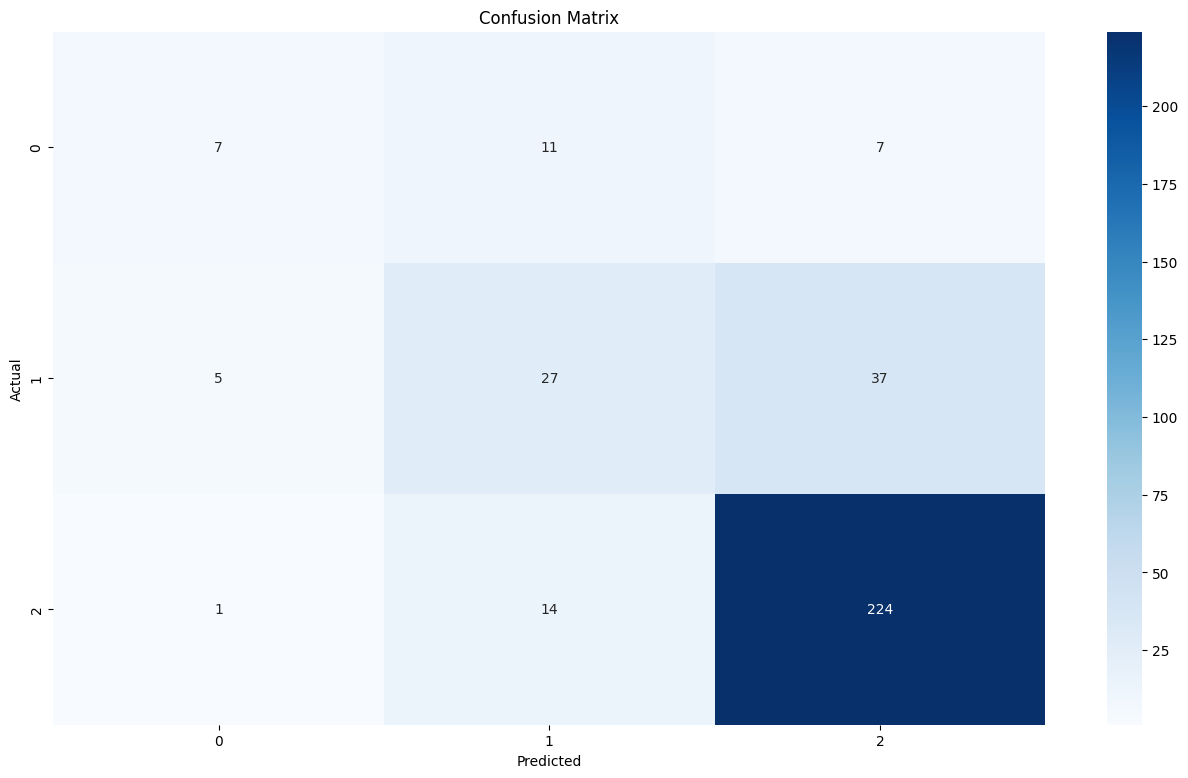

In [451]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [400]:
from sklearn.metrics import classification_report

precision = precision_score(
    y_test['rain_class_num'],
    y_pred_rain,
    average='weighted',
    zero_division=0
)

recall = recall_score(
    y_test['rain_class_num'],
    y_pred_rain,
    average='weighted',
    zero_division=0
)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.772950728506284
Recall: 0.8018018018018018


# Support Vector Machine

In [469]:
def svm_objective(trial):

    C = trial.suggest_float('C', 1, 50, log=True)
    gamma = trial.suggest_float('gamma', 0.001, 0.1, log=True)

    class_weights = {
        0: 4,   # heavy (increase if recall is still low)
        1: 2,
        2: 1
    }

    model = SVC(
        kernel='rbf',
        C=C,
        gamma=gamma,
        probability=True,
        class_weight=class_weights
    )

    score = cross_val_score(
        model,
        X_train_scaled,
        y_train['rain_class_num'],
        cv=3,
        scoring='accuracy'
    ).mean()

    return score

In [470]:
svc_study = optuna.create_study(direction='maximize')
svc_study.optimize(svm_objective, n_trials=50)

print("Best SVM Accuracy:", svc_study.best_value)
print("Best SVM Params:", svc_study.best_params)

[I 2025-12-18 15:11:10,592] A new study created in memory with name: no-name-168db18b-df56-4af8-9e92-712fc9131bab
[I 2025-12-18 15:11:11,354] Trial 0 finished with value: 0.7295128085195804 and parameters: {'C': 3.1532993701008025, 'gamma': 0.024557055784745593}. Best is trial 0 with value: 0.7295128085195804.
[I 2025-12-18 15:11:12,037] Trial 1 finished with value: 0.7482985242578922 and parameters: {'C': 4.031521514845525, 'gamma': 0.002127311362440053}. Best is trial 1 with value: 0.7482985242578922.
[I 2025-12-18 15:11:12,855] Trial 2 finished with value: 0.740028403120954 and parameters: {'C': 1.4491487765229645, 'gamma': 0.017604528759075807}. Best is trial 1 with value: 0.7482985242578922.
[I 2025-12-18 15:11:13,480] Trial 3 finished with value: 0.7325158115225835 and parameters: {'C': 39.894849694852525, 'gamma': 0.02304068087334744}. Best is trial 1 with value: 0.7482985242578922.
[I 2025-12-18 15:11:14,137] Trial 4 finished with value: 0.7505456924192816 and parameters: {'C':

Best SVM Accuracy: 0.7580565893206975
Best SVM Params: {'C': 49.60687098016431, 'gamma': 0.07452051667675205}


In [471]:
#use bst param and  get svm
final_modelSVC = SVC(
    C=svc_study.best_params['C'],
    gamma=svc_study.best_params['gamma'],
    kernel='rbf',
    probability=True,
    
)

final_modelSVC.fit(X_train_scaled, y_train['rain_class_num'])
y_pred_rain_svc=final_modelSVC.predict(X_test_scaled)

In [472]:
# Accuracy
accuracy = accuracy_score(y_test['rain_class_num'], y_pred_rain_svc)
print("Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test['rain_class_num'], y_pred_rain_svc)
print("Confusion Matrix:\n", cm)

# Classification Report (Precision, Recall, F1-score)
report = classification_report(y_test['rain_class_num'], y_pred_rain_svc)
print("Classification Report:\n", report)

Accuracy: 0.7867867867867868
Confusion Matrix:
 [[  7   6  12]
 [  4  28  37]
 [  1  11 227]]
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.28      0.38        25
           1       0.62      0.41      0.49        69
           2       0.82      0.95      0.88       239

    accuracy                           0.79       333
   macro avg       0.68      0.55      0.58       333
weighted avg       0.76      0.79      0.76       333



In [473]:
accuracy_score(y_test['rain_class_num'], y_pred_rain_svc)

0.7867867867867868

# XGBClassifier

In [379]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
class_weights = {
    0: 3.0,   # Heavy (boosted)
    1: 1.5,   # Mid
    2: 1.0    # Low
}

In [380]:
X_np = X_train_scaled
y_np = y_train['rain_class_num'].values

In [381]:
def objective(trial):

    params = {
        'objective': 'multi:softprob',
        'num_class': 3,
        'eval_metric': 'mlogloss',

        'max_depth': trial.suggest_int('max_depth', 3, 8),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.05),
        'n_estimators': trial.suggest_int('n_estimators', 400, 900),
        'subsample': trial.suggest_float('subsample', 0.6, 0.9),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 1, 5),
        'min_child_weight': trial.suggest_int('min_child_weight', 4, 10),

        'random_state': 42,
        'n_jobs': -1
    }

    f1_scores = []

    for train_idx, val_idx in skf.split(X_np, y_np):

        X_tr, X_val = X_np[train_idx], X_np[val_idx]
        y_tr, y_val = y_np[train_idx], y_np[val_idx]

        sample_weights = pd.Series(y_tr).map(class_weights).values

        model = XGBClassifier(**params)
        model.fit(X_tr, y_tr, sample_weight=sample_weights)

        y_pred = model.predict(X_val)
        f1_scores.append(f1_score(y_val, y_pred, average='macro'))

    return np.mean(f1_scores)
    

In [382]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)  # You can increase trials for better tuning

print("f1_scores:", study.best_value)
print("Best Params:", study.best_params)

[I 2025-12-18 13:01:31,566] A new study created in memory with name: no-name-c289ca44-bda4-4472-8b17-181156bdc7d1
[I 2025-12-18 13:01:34,119] Trial 0 finished with value: 0.6018044368470746 and parameters: {'max_depth': 3, 'learning_rate': 0.012482285823160884, 'n_estimators': 848, 'subsample': 0.777450680703933, 'colsample_bytree': 0.7297746856288264, 'gamma': 2.284302871098769, 'min_child_weight': 6}. Best is trial 0 with value: 0.6018044368470746.
[I 2025-12-18 13:01:36,402] Trial 1 finished with value: 0.5875136820057605 and parameters: {'max_depth': 7, 'learning_rate': 0.0495985627644145, 'n_estimators': 753, 'subsample': 0.7666801347561731, 'colsample_bytree': 0.9520314176618323, 'gamma': 1.8923960656077576, 'min_child_weight': 7}. Best is trial 0 with value: 0.6018044368470746.
[I 2025-12-18 13:01:38,025] Trial 2 finished with value: 0.5909220163475466 and parameters: {'max_depth': 5, 'learning_rate': 0.043486098431403566, 'n_estimators': 739, 'subsample': 0.739446661673126, 'co

Best Accuracy: 0.607170618878855
Best Params: {'max_depth': 3, 'learning_rate': 0.026807165506008396, 'n_estimators': 836, 'subsample': 0.6021886872818141, 'colsample_bytree': 0.7522633808016925, 'gamma': 3.625041291723758, 'min_child_weight': 5}


In [383]:
best_params = study.best_params

final_modelXGB = XGBClassifier(
    **best_params,
    objective='multi:softprob',
    num_class=3,
    eval_metric='mlogloss',
    random_state=42,
    n_jobs=-1
)

final_sample_weights = y_train['rain_class_num'].map(class_weights)

final_modelXGB.fit(
    X_train_scaled,
    y_train['rain_class_num'],
    sample_weight=final_sample_weights
)
y_pred_xgb = final_modelXGB.predict(X_test_scaled)

In [384]:
print("Accuracy:", accuracy_score(y_test['rain_class_num'], y_pred_xgb))

print(classification_report(
    y_test['rain_class_num'],
    y_pred_xgb,
    target_names=['Heavy', 'Mid', 'Low']
))

Accuracy: 0.7837837837837838
              precision    recall  f1-score   support

       Heavy       0.48      0.46      0.47        26
         Mid       0.54      0.50      0.52        68
         Low       0.88      0.90      0.89       239

    accuracy                           0.78       333
   macro avg       0.63      0.62      0.63       333
weighted avg       0.78      0.78      0.78       333



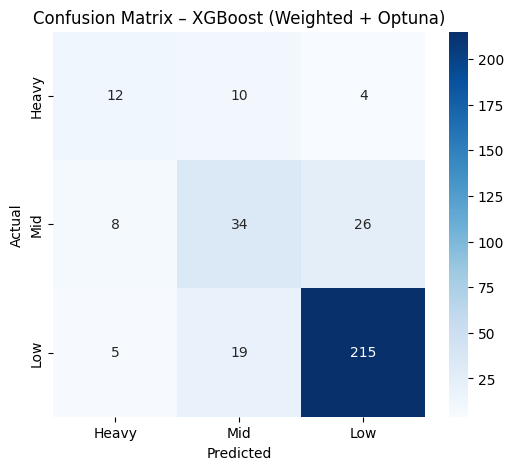

In [385]:
cm = confusion_matrix(y_test['rain_class_num'], y_pred_xgb)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Heavy', 'Mid', 'Low'],
    yticklabels=['Heavy', 'Mid', 'Low']
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – XGBoost (Weighted + Optuna)")
plt.show()

# VotingClassifier

In [452]:
from sklearn.ensemble import VotingClassifier

voting_soft = VotingClassifier(
    estimators=[
        ('rf', final_modelRFC),
        ('xgb', final_modelXGB),
        ('svc', final_modelSVC)   # optional
    ],
    voting='soft',
    weights=[2, 3, 1]  # XGB weighted higher
)

In [453]:
voting_soft.fit(X_train_scaled, y_train['rain_class_num'])
y_pred_vote = voting_soft.predict(X_test_scaled)
print("Voting Accuracy:", accuracy_score(y_test['rain_class_num'], y_pred_vote))

Voting Accuracy: 0.7777777777777778
